In [18]:
#importando as bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
dados = pd.read_csv('dadosclientes.csv')

In [51]:
dados.head()

,clientes,Valor_compra,qtde_produtos,forma_pag
0,cliente 2,378,10,PIX
1,cliente 5,475,18,PIX
2,cliente 1,285,10,PIX
3,cliente 1,181,4,Crédito
4,cliente 7,177,20,PIX


In [50]:
dados['forma_pag']=dados['forma_pag'].map({1:'PIX',0:'Crédito'})

In [28]:
# Separando a base de dados em X e Y
x=dados[['Valor_compra','qtde_produtos']]
y=dados['forma_pag']

In [38]:
# Dividindo a base de dados em treino e teste
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,
                                                random_state=42)

In [30]:
print(x_train.isnull().sum())

Valor_compra     0
qtde_produtos    0
dtype: int64


In [39]:
# Criação do medelo de Machine Learning
modelo= SVC(kernel='linear')
modelo.fit(x_train,y_train)

SVC(kernel='linear')

In [43]:
# Fazendo predições
yprev = modelo.predict(x_test)
yprev

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [35]:
x_test

,Valor_compra,qtde_produtos
95,429,7
15,407,10
30,436,10
158,292,9
128,20,9
115,346,19
69,472,10
170,195,7
174,487,16
45,284,15


In [36]:
# Calculo das métricas do algoritimo de Machine Learning
# Acurácia = VP+VN / Total(VP + FP+FN+VN)
acc = accuracy_score(yprev,y_test)
acc

0.3

In [37]:
# Classification report
cr=classification_report(yprev,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.30      0.46        60

    accuracy                           0.30        60
   macro avg       0.50      0.15      0.23        60
weighted avg       1.00      0.30      0.46        60



c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [44]:
# Matriz de confusão
cm = confusion_matrix(yprev,y_test)
print(cm)

[[10  2]
 [19  9]]


Text(50.722222222222214, 0.5, 'Real')

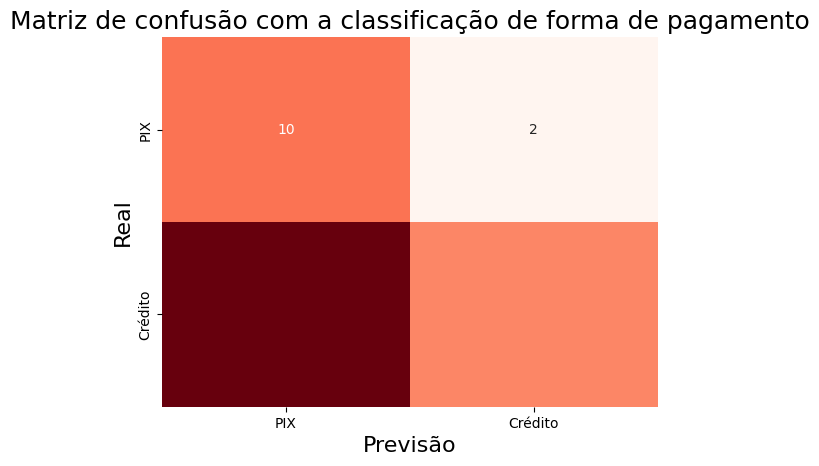

In [46]:
# Visualizando a matriz de confusão de forma gráfica
sns.heatmap(cm,annot=True,cmap='Reds',cbar=False,
            xticklabels=['PIX','Crédito'],
            yticklabels=['PIX','Crédito']
)
plt.title('Matriz de confusão com a classificação de forma de pagamento',fontsize=18)
plt.xlabel('Previsão',fontsize=16)
plt.ylabel('Real',fontsize=16)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

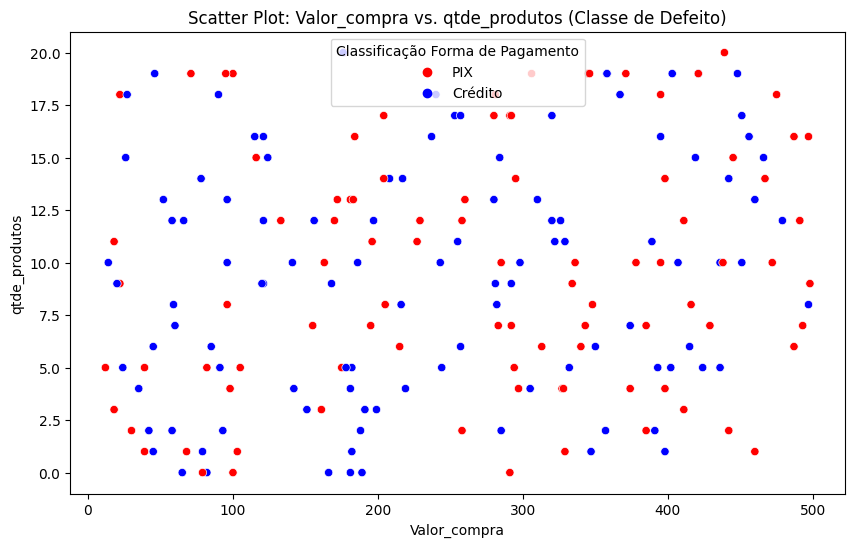

In [52]:
# Mapeando as cores com base na classe
palette = {"PIX": "red", "Crédito": "blue"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Valor_compra', y='qtde_produtos', hue='forma_pag', data=dados, palette= palette)
 
# Personalizando o gráfico
plt.title('Scatter Plot: Valor_compra vs. qtde_produtos (Classe de Defeito)')
plt.xlabel('Valor_compra')
plt.ylabel('qtde_produtos')
 
# Mostrando o gráfico
plt.legend(title='Classificação Forma de Pagamento')
plt.show()